# 03-ibs-simstudy.ipynb

See also  [PCBBE_2023-PLEN-04-Debate-AL.md](../PCBBE_2023-PLEN-04-Debate-AL.md)

In [19]:
import pandas as pd
import numpy as np

# Create an empty DataFrame
columns = ['Participant_ID', 'Group', 'Baseline_IBS_Symptoms', 'Baseline_Stress_Level',
           'Baseline_Microbiota_Diversity', 'Post_IBS_Symptoms', 'Post_Stress_Level', 'Post_Microbiota_Diversity']
df = pd.DataFrame(columns=columns)

# Simulate data for 500 participants
for i in range(500):
    participant_id = i + 1
    
    # Assign group (1: Probiotic, 2: Prebiotic, 3: Placebo, 4: Control)
    if i < 125:
        group = 1
    elif i < 250:
        group = 2
    elif i < 375:
        group = 3
    else:
        group = 4
    
    # Simulate baseline data
    baseline_IBS_symptoms = np.random.randint(0, 100) if group != 4 else np.random.randint(0, 20)
    baseline_stress_level = np.random.randint(0, 100)
    baseline_microbiota_diversity = np.random.uniform(0, 1)
    
    # Simulate post-intervention data
    if group == 1:  # Probiotic
        post_IBS_symptoms = baseline_IBS_symptoms - np.random.randint(5, 20)
    elif group == 2:  # Prebiotic
        post_IBS_symptoms = baseline_IBS_symptoms - np.random.randint(0, 10)
    elif group == 3:  # Placebo
        post_IBS_symptoms = baseline_IBS_symptoms + np.random.randint(-5, 5)
    else:  # Control
        post_IBS_symptoms = baseline_IBS_symptoms + np.random.randint(-5, 5)
    
    post_stress_level = baseline_stress_level + np.random.randint(-10, 10)
    post_microbiota_diversity = baseline_microbiota_diversity + np.random.uniform(-0.1, 0.1)
    
    # Append to DataFrame
    df.loc[i] = [participant_id, group, baseline_IBS_symptoms, baseline_stress_level,
                 baseline_microbiota_diversity, post_IBS_symptoms, post_stress_level, post_microbiota_diversity]

# Save DataFrame to CSV file
df.to_csv('./data/simulated_IBS_study_data.csv', index=False)


Python code for each of the suggested analyses. The simulated data is at ./data/simulated_IBS_study_data.csv.

In [20]:
import pandas as pd

# Read the data
df = pd.read_csv('./data/simulated_IBS_study_data.csv')
df

,Participant_ID,Group,Baseline_IBS_Symptoms,Baseline_Stress_Level,Baseline_Microbiota_Diversity,Post_IBS_Symptoms,Post_Stress_Level,Post_Microbiota_Diversity
0,1.0,1.0,19.0,8.0,0.810865,6.0,-1.0,0.824429
1,2.0,1.0,25.0,74.0,0.086102,13.0,77.0,0.127852
2,3.0,1.0,17.0,15.0,0.710356,-1.0,5.0,0.786327
3,4.0,1.0,91.0,25.0,0.007585,73.0,31.0,0.074586
4,5.0,1.0,54.0,62.0,0.410163,41.0,71.0,0.338769
...,...,...,...,...,...,...,...,...
495,496.0,4.0,5.0,83.0,0.619737,6.0,73.0,0.583536
496,497.0,4.0,7.0,6.0,0.059705,8.0,7.0,0.126273
497,498.0,4.0,4.0,58.0,0.698753,-1.0,51.0,0.771121
498,499.0,4.0,2.0,17.0,0.068681,3.0,12.0,0.164517


In [21]:
# Calculate descriptive statistics
print("Descriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       Participant_ID       Group  Baseline_IBS_Symptoms  \
count      500.000000  500.000000             500.000000   
mean       250.500000    2.500000              37.978000   
std        144.481833    1.119154              29.311702   
min          1.000000    1.000000               0.000000   
25%        125.750000    1.750000              12.000000   
50%        250.500000    2.500000              31.000000   
75%        375.250000    3.250000              62.000000   
max        500.000000    4.000000              99.000000   

       Baseline_Stress_Level  Baseline_Microbiota_Diversity  \
count             500.000000                     500.000000   
mean               47.942000                       0.513993   
std                28.451672                       0.288737   
min                 0.000000                       0.000776   
25%                24.000000                       0.266710   
50%                48.500000                       0.5180

In [22]:
from scipy import stats

# Perform t-tests for IBS symptoms between groups
for i in range(1, 5):
    for j in range(i+1, 5):
        t_stat, p_val = stats.ttest_ind(df[df['Group'] == i]['Post_IBS_Symptoms'], df[df['Group'] == j]['Post_IBS_Symptoms'])
        print(f"T-test between Group {i} and Group {j} for Post_IBS_Symptoms: t = {t_stat}, p = {p_val}")


T-test between Group 1 and Group 2 for Post_IBS_Symptoms: t = -2.5465244098155226, p = 0.011485638160816627
T-test between Group 1 and Group 3 for Post_IBS_Symptoms: t = -2.3333518591845643, p = 0.020429683212051474
T-test between Group 1 and Group 4 for Post_IBS_Symptoms: t = 10.418064715898279, p = 2.5694207393122855e-21
T-test between Group 2 and Group 3 for Post_IBS_Symptoms: t = 0.145288295021962, p = 0.8846012673027128
T-test between Group 2 and Group 4 for Post_IBS_Symptoms: t = 14.89842132486378, p = 2.7629087109147602e-36
T-test between Group 3 and Group 4 for Post_IBS_Symptoms: t = 13.855327322884579, p = 1.0225670676399368e-32


In [23]:
# Calculate correlation matrix
print("Correlation Matrix:")
print(df.corr())


Correlation Matrix:
                               Participant_ID     Group  \
Participant_ID                       1.000000  0.968248   
Group                                0.968248  1.000000   
Baseline_IBS_Symptoms               -0.439518 -0.465596   
Baseline_Stress_Level                0.062673  0.045031   
Baseline_Microbiota_Diversity       -0.054091 -0.053186   
Post_IBS_Symptoms                   -0.302327 -0.325658   
Post_Stress_Level                    0.046542  0.027920   
Post_Microbiota_Diversity           -0.039298 -0.039098   

                               Baseline_IBS_Symptoms  Baseline_Stress_Level  \
Participant_ID                             -0.439518               0.062673   
Group                                      -0.465596               0.045031   
Baseline_IBS_Symptoms                       1.000000              -0.001417   
Baseline_Stress_Level                      -0.001417               1.000000   
Baseline_Microbiota_Diversity               0.102753 

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare data
X = df[['Baseline_IBS_Symptoms', 'Baseline_Stress_Level', 'Baseline_Microbiota_Diversity']]
y = df['Post_IBS_Symptoms']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 31.814583000000002


What about some informative plots and graphs - both exploratory and related to the machine learning models - e.g. feature importance (Shapley, permutation importance).

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#import shap

# Read the data
df = pd.read_csv('./data/simulated_IBS_study_data.csv')

Histograms for Baseline and Post-Intervention IBS Symptoms

/Users/arvid/opt/anaconda3/envs/pcbbe-2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/arvid/opt/anaconda3/envs/pcbbe-2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/arvid/opt/anaconda3/envs/pcbbe-2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/arvid/opt/anaconda3/envs/pcbbe-2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

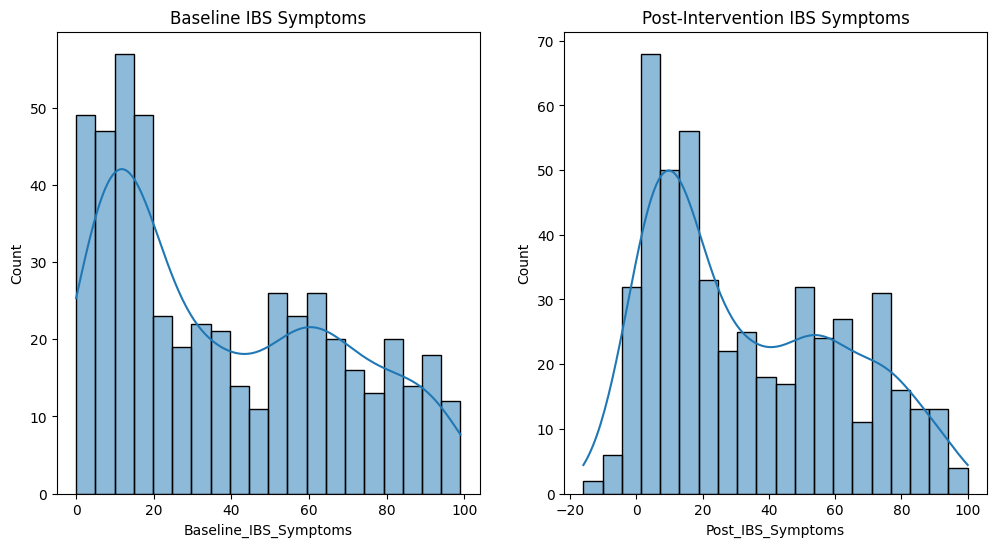

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Baseline_IBS_Symptoms'], bins=20, kde=True)
plt.title('Baseline IBS Symptoms')
plt.subplot(1, 2, 2)
sns.histplot(df['Post_IBS_Symptoms'], bins=20, kde=True)
plt.title('Post-Intervention IBS Symptoms')
plt.show()


Boxplot for Post-Intervention IBS Symptoms by Group

/Users/arvid/opt/anaconda3/envs/pcbbe-2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/arvid/opt/anaconda3/envs/pcbbe-2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/arvid/opt/anaconda3/envs/pcbbe-2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


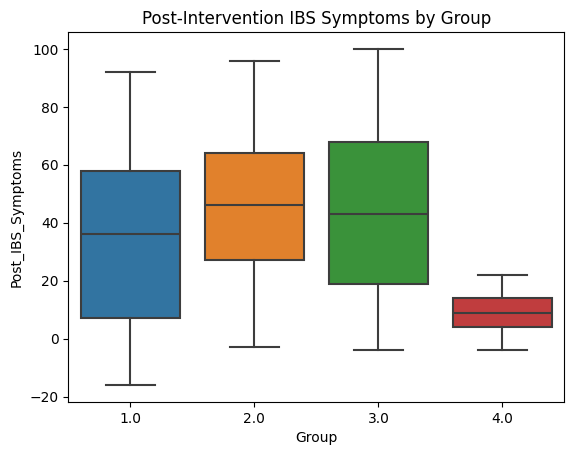

In [27]:
sns.boxplot(x='Group', y='Post_IBS_Symptoms', data=df)
plt.title('Post-Intervention IBS Symptoms by Group')
plt.show()


Machine Learning Model and Feature Importance

Train Random Forest Model

In [28]:
# Prepare data
X = df[['Baseline_IBS_Symptoms', 'Baseline_Stress_Level', 'Baseline_Microbiota_Diversity']]
y = df['Post_IBS_Symptoms']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Feature Importance using Permutation Importance

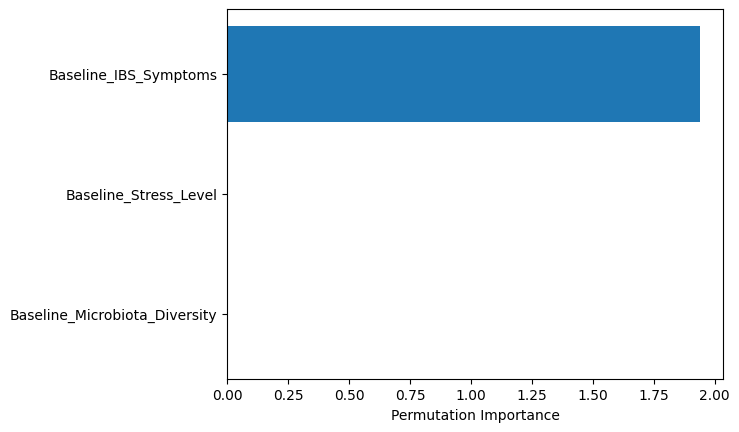

In [29]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.barh(range(X_test.shape[1]), result.importances_mean[sorted_idx])
plt.yticks(range(X_test.shape[1]), X_test.columns[sorted_idx])
plt.xlabel('Permutation Importance')
plt.show()


You can use built-in methods in scikit-learn to assess feature importance without requiring SHAP. Random Forest models in scikit-learn have a feature_importances_ attribute that can give you a straightforward measure of feature importance.

Here's how you can plot feature importance using the Random Forest model you've already trained:

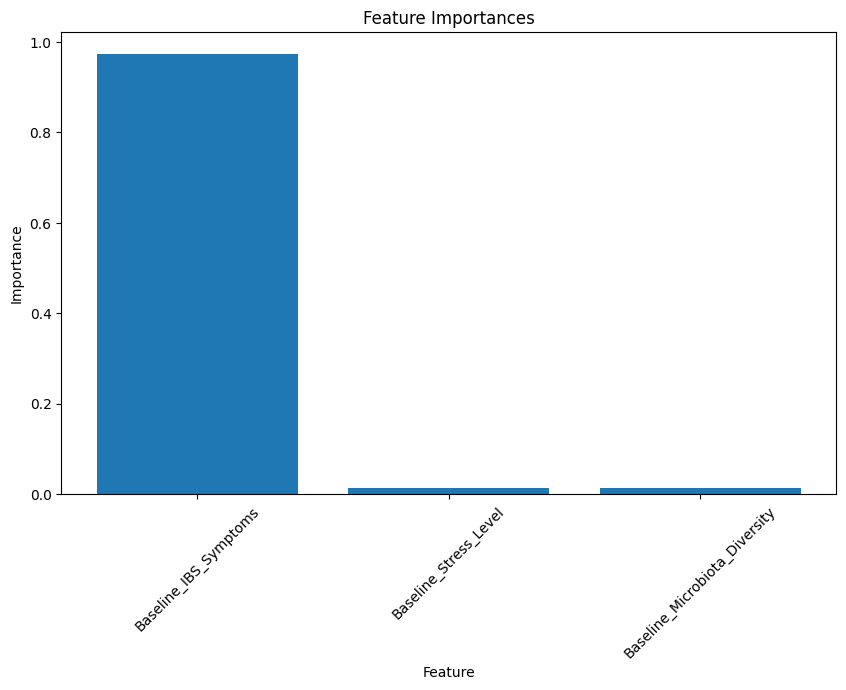

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = rf.feature_importances_

# Get the indices of the most important features, sorted by importance
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


Casting the original regression problem to a three-class problem with equi-probable classes

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Divide 'Post_IBS_Symptoms' into quantiles to create three equi-probable classes
labels = ['Low', 'Medium', 'High']
y_train_class = pd.qcut(y_train, q=3, labels=labels)
y_test_class = pd.qcut(y_test, q=3, labels=labels)

# Convert labels to numerical values for scikit-learn
y_train_class = y_train_class.cat.codes
y_test_class = y_test_class.cat.codes

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train_class)

# Make predictions
y_pred_class = clf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)
print("Confusion Matrix:")
print(cm)

# Calculate metrics
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class, target_names=labels))


Confusion Matrix:
[[32  4  0]
 [11 20  0]
 [ 0  6 27]]
Classification Report:
              precision    recall  f1-score   support

         Low       0.74      0.89      0.81        36
      Medium       0.67      0.65      0.66        31
        High       1.00      0.82      0.90        33

    accuracy                           0.79       100
   macro avg       0.80      0.78      0.79       100
weighted avg       0.80      0.79      0.79       100



You can use the heatmap function from the seaborn library to display the confusion matrix graphically. Annotations can be added to show the actual numbers in each cell of the matrix, as well as derived metrics like precision, recall, and F1-score.

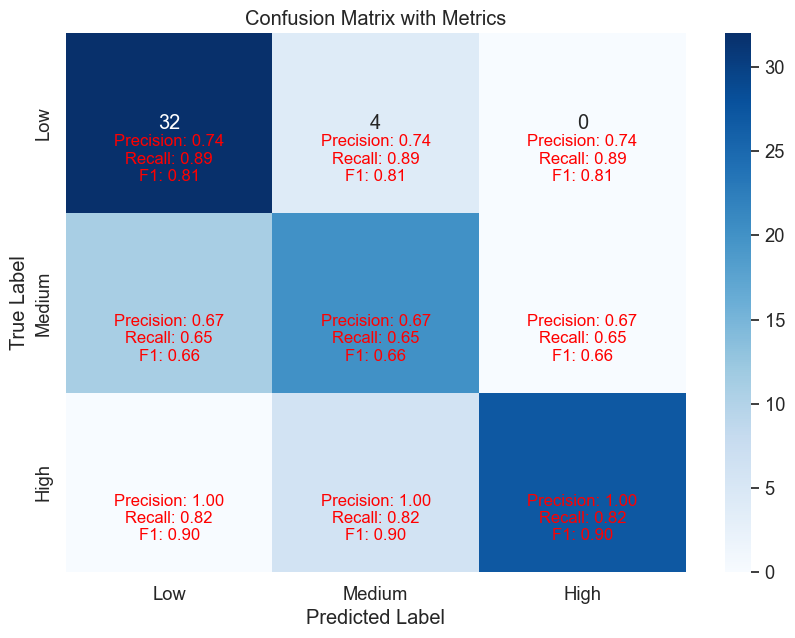

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix (assuming y_test_class and y_pred_class are already defined)
cm = confusion_matrix(y_test_class, y_pred_class)

# Calculate metrics
report = classification_report(y_test_class, y_pred_class, target_names=labels, output_dict=True)

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add metrics annotations
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j+0.5, i+0.7,
                 f"Precision: {report[labels[i]]['precision']:.2f}\nRecall: {report[labels[i]]['recall']:.2f}\nF1: {report[labels[i]]['f1-score']:.2f}",
                 horizontalalignment='center',
                 verticalalignment='center',
                 fontsize=12,
                 color='red')

plt.title('Confusion Matrix with Metrics')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
